In [1]:
from scipy.linalg import logm

X = [[0, 1], [1, 0]] # Pauli X

# We are looking for the Hamiltonian H such that expm(-iH) = X

print(logm(X), "\n") # log of X
# It follows that the Hamiltonian H is then:
H = 1j*logm(X)
print(H, "\n")

[[-1.85615412e-16+1.57079633j  1.85615412e-16-1.57079633j]
 [ 1.85615412e-16-1.57079633j -1.85615412e-16+1.57079633j]] 

[[-1.57079633-1.85615412e-16j  1.57079633+1.85615412e-16j]
 [ 1.57079633+1.85615412e-16j -1.57079633-1.85615412e-16j]] 



In [2]:
# Let's check that expm(-iH) = X
from scipy.linalg import expm
print(expm(-1j*H), "\n")

[[1.11022302e-16+1.33226763e-15j 1.00000000e+00-1.33226763e-15j]
 [1.00000000e+00-1.33226763e-15j 3.33066907e-16+1.33226763e-15j]] 



In [3]:
# Now we model the state of a qubit with the Hamiltonian H 
# and see how it evolves in time

from qiskit.quantum_info import Operator, Statevector

def evolveTime(H, t, psi0):
    '''Evolve the state psi0 under the Hamiltonian H for time t'''
    U = expm(-1j*H*t)
    return psi0.evolve(Operator(U))

v = Statevector([1, 0])

print(evolveTime(H, 1, v)) # Should be [0, 1] = |1>



Statevector([1.11022302e-16+1.33226763e-15j,
             1.00000000e+00-1.33226763e-15j],
            dims=(2,))


In [4]:
v.probabilities_dict() # Should be {0: 1.0, 1: 0.0}

{np.str_('0'): np.float64(1.0)}

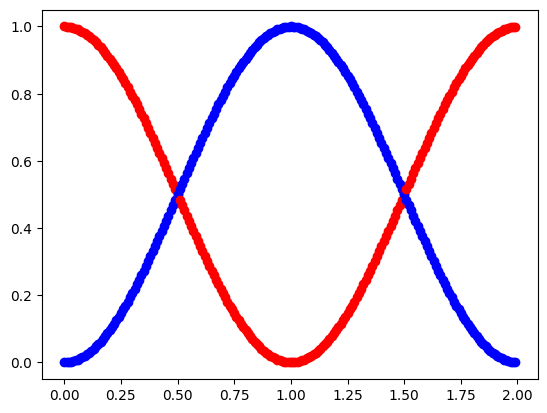

In [5]:
# Let's plot the evolution of the state of a qubit under the Hamiltonian H
import matplotlib.pyplot as plt

def plotEvolution(H, psi0, tmax, dt):
    '''Plot the evolution of the state psi0 under the Hamiltonian H'''
    t = 0
    while t < tmax:
        psi = evolveTime(H, t, psi0)
        try:
            plt.plot(t, psi.probabilities_dict()['0'], 'ro')
        except KeyError:
            plt.plot(t, 0, 'ro')
        try:
            plt.plot(t, psi.probabilities_dict()['1'], 'bo')
        except KeyError:
            plt.plot(t, 0, 'bo')
        t += dt
    plt.show()
    
plotEvolution(H, v, 2, 0.01)

In [6]:
# Let's define a function that returns the relative phase of a 
# qubit state
from numpy import abs, angle, conjugate, log
def relativePhase(v : Statevector):
    '''Return the relative phase of the qubit state v'''
    a, b = v[0], v[1]
    #print(a, b)
    #print(-1j * log((b * conjugate(a)) / (abs(a) * abs(b))))
    return angle(b) - angle(a)    
    

#====================================================#
Razlika ob preteku časa 0 je 0j 
in 0j 

FAZI: faza a: 0.0 faza b: 0.0
#====================================================#
#====================================================#
Razlika ob preteku časa 0.01 je (-0.0002467198171342+0.015705379539064136j) 
in (0.00024671981713422287-0.015705379539064132j) 

FAZI: faza a: 0.0 faza b: 0.0
#====================================================#
#====================================================#
Razlika ob preteku časa 0.02 je (-0.0007399159687300205+0.015689880225592524j) 
in (0.0007399159687299979-0.015689880225592527j) 

FAZI: faza a: 0.015707963267948953 faza b: -1.5550883635269475
#====================================================#
#====================================================#
Razlika ob preteku časa 0.03 je (-0.0012323819125957813+0.01565889689460046j) 
in (0.0012323819125957737-0.01565889689460044j) 

FAZI: faza a: 0.031415926535897906 faza b: -1.5393804002589986

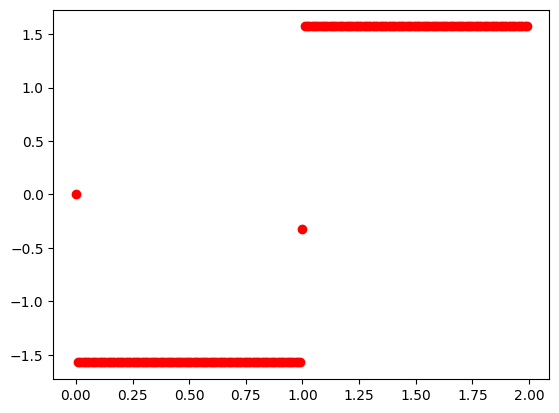

In [7]:
# Now let's see how the phase of the state evolves under the Hamiltonian H

def plotPhaseEvolution(H, psi0, tmax, dt):
    '''Plot the evolution of the phase of the state psi0 under the Hamiltonian H'''
    t = 0
    a, b = psi0[0], psi0[1]
    while t < tmax:
        psi = evolveTime(H, t, psi0)
        
        print("#====================================================#")
        print(f'Razlika ob preteku časa {t} je',psi[0] - a, '\nin', psi[1] - b, '\n')
        print(f'FAZI: faza a: {angle(a)} faza b: {angle(b)}')
        print("#====================================================#")
        a, b = psi[0], psi[1]
        
        plt.plot(t, relativePhase(psi), 'ro')
        t += dt
    plt.show()
    
plotPhaseEvolution(H, v, 2, 0.01)

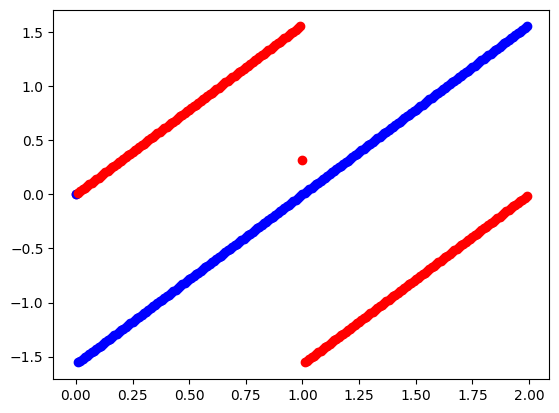

In [8]:
# Something weird is going on with the phase evolution.
# There is a discontinuity in the phase evolution at t = 1. Let's plot
# the separate phases.
def plotPhaseEvolutionSeparate(H, psi0, tmax, dt):
    '''Plot the evolution of the phase of the state psi0 under the Hamiltonian H'''
    t = 0
    a, b = psi0[0], psi0[1]
    while t < tmax:
        psi = evolveTime(H, t, psi0)
        plt.plot(t, angle(psi[0]), 'ro')
        plt.plot(t, angle(psi[1]), 'bo')
        t += dt
    plt.show()
    
plotPhaseEvolutionSeparate(H, v, 2, 0.01)

The discontinuity issue has been resolved. We can see that separately the phases of $\alpha$ and $\beta$ are changing linearly with respect to time, but their difference remains constant. What does tend to happen though, is that the relative phase changes sign at $t = 1$.